# Data in Motion Weekly Data Analysis Challenge
## Week 8: World Rollercoasters

Link to dataset: https://buff.ly/3k6woDG 

Challenge Questions:

1.    How many columns and rows are in the dataset?
2.    Is there any missing data?
3.    Display the summary statistics of the numeric columns using the describe method.
4.    Rename the following columns:
       - coaster_name  ➡️  Coaster_Name
       - year_introduced ➡️ Year_Introduced
       - opening_date_clean ➡️ Opening_Date
       - speed_mph ➡️ Speed_mph
       - height_ft ➡️ Height_ft
       - Inversions_clean ➡️ Inversions
       - Gforce_clean ➡️ Gforce
5.    Are there any duplicated rows?
6.    What are the top 3 years with the most roller coasters introduced?
7.    What is the average speed? Also display a plot to show it's distribution.
8.    Explore the feature relationships. Are there any positively or negatively correlated relationships?
9.    Create your own question and answer it.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data:
url = 'https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv'
df = pd.read_csv(url)

In [3]:
# view head of data
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [4]:
# view info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

### 1.    How many columns and rows are in the dataset?

In [5]:
df.shape

(1087, 56)

**There are 1,087 rows and 56 columns.**

### 2.    Is there any missing data?

In [6]:
# check nulls per column
df.isnull().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [7]:
# check total number of null values in the data set
df.isnull().sum().sum()

29435

**There are 29,435 null values accross several columns.**

### 3.    Display the summary statistics of the numeric columns using the describe method

In [8]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


### 4.    Rename the following columns:
 - coaster_name  ➡️  Coaster_Name
 - year_introduced ➡️ Year_Introduced
 - opening_date_clean ➡️ Opening_Date
 - speed_mph ➡️ Speed_mph
 - height_ft ➡️ Height_ft
 - Inversions_clean ➡️ Inversions
 - Gforce_clean ➡️ Gforce

In [9]:
# dropping the first Inversions and G-force columns before renaming the clean columns
df = df.drop(columns=['Inversions', 'G-force'])

# rename columns
df.rename(columns={'coaster_name':'Coaster_Name', 'year_introduced':'Year_Introduced', 'opening_date_clean':'Opening_Date',
                  'speed_mph':'Speed_mph', 'height_ft':'Height_ft', 'Inversions_clean':'Inversions', 'Gforce_clean':'Gforce'}, inplace=True)

In [10]:
df.head()

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_mph,height_value,height_unit,Height_ft,Inversions,Gforce
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


### 5.    Are there any duplicated rows?

In [11]:
df.duplicated().sum()

0

**There are no duplicate rows present.**

### 6.    What are the top 3 years with the most roller coasters introduced?

In [12]:
top_years = df.groupby('Opening_Date')['Coaster_Name'].agg('count').sort_values(ascending=False).copy().reset_index().head(3)
top_years

,Opening_Date,Coaster_Name
0,1999-01-01,10
1,2022-01-01,8
2,1998-01-01,7


**1999, 2022, and 1998 were the top three years with new rollercoasters introduced.**

### 7.    What is the average speed? Also display a plot to show it's distribution.

In [13]:
df['Speed_mph'].mean()

48.617289220917804

**The average speed is 48.6 MPH**

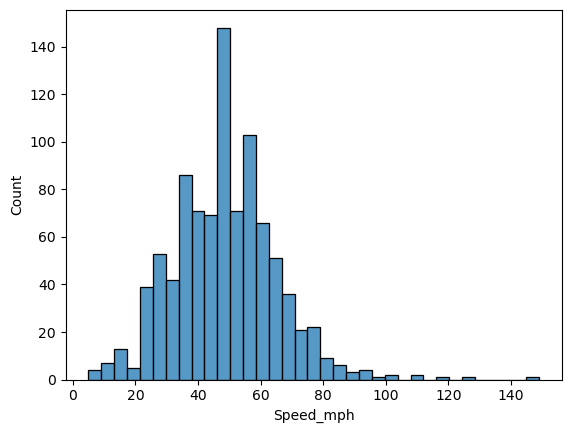

In [14]:
sns.histplot(df['Speed_mph'])
plt.show()

### 8.    Explore the feature relationships. Are there any positively or negatively correlated relationships?

In [15]:
# compute pair-wise correlations
df.corr()

,Year_Introduced,latitude,longitude,speed1_value,Speed_mph,height_value,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,-0.070982,0.175913,0.210191,0.204853,0.087687,0.232150,0.228758,-0.066657
latitude,-0.070982,1.000000,-0.298488,-0.121847,-0.063757,-0.004265,0.011492,-0.014043,0.042871
longitude,0.175913,-0.298488,1.000000,0.301179,0.051063,-0.092764,0.159733,0.087160,0.016485
speed1_value,0.210191,-0.121847,0.301179,1.000000,0.851667,0.088761,0.815103,0.176105,0.379962
Speed_mph,0.204853,-0.063757,0.051063,0.851667,1.000000,0.241461,0.829404,0.265763,0.489337
height_value,0.087687,-0.004265,-0.092764,0.088761,0.241461,1.000000,1.000000,0.108199,0.337386
Height_ft,0.232150,0.011492,0.159733,0.815103,0.829404,1.000000,1.000000,0.164246,0.475020
Inversions,0.228758,-0.014043,0.087160,0.176105,0.265763,0.108199,0.164246,1.000000,0.345106
Gforce,-0.066657,0.042871,0.016485,0.379962,0.489337,0.337386,0.475020,0.345106,1.000000


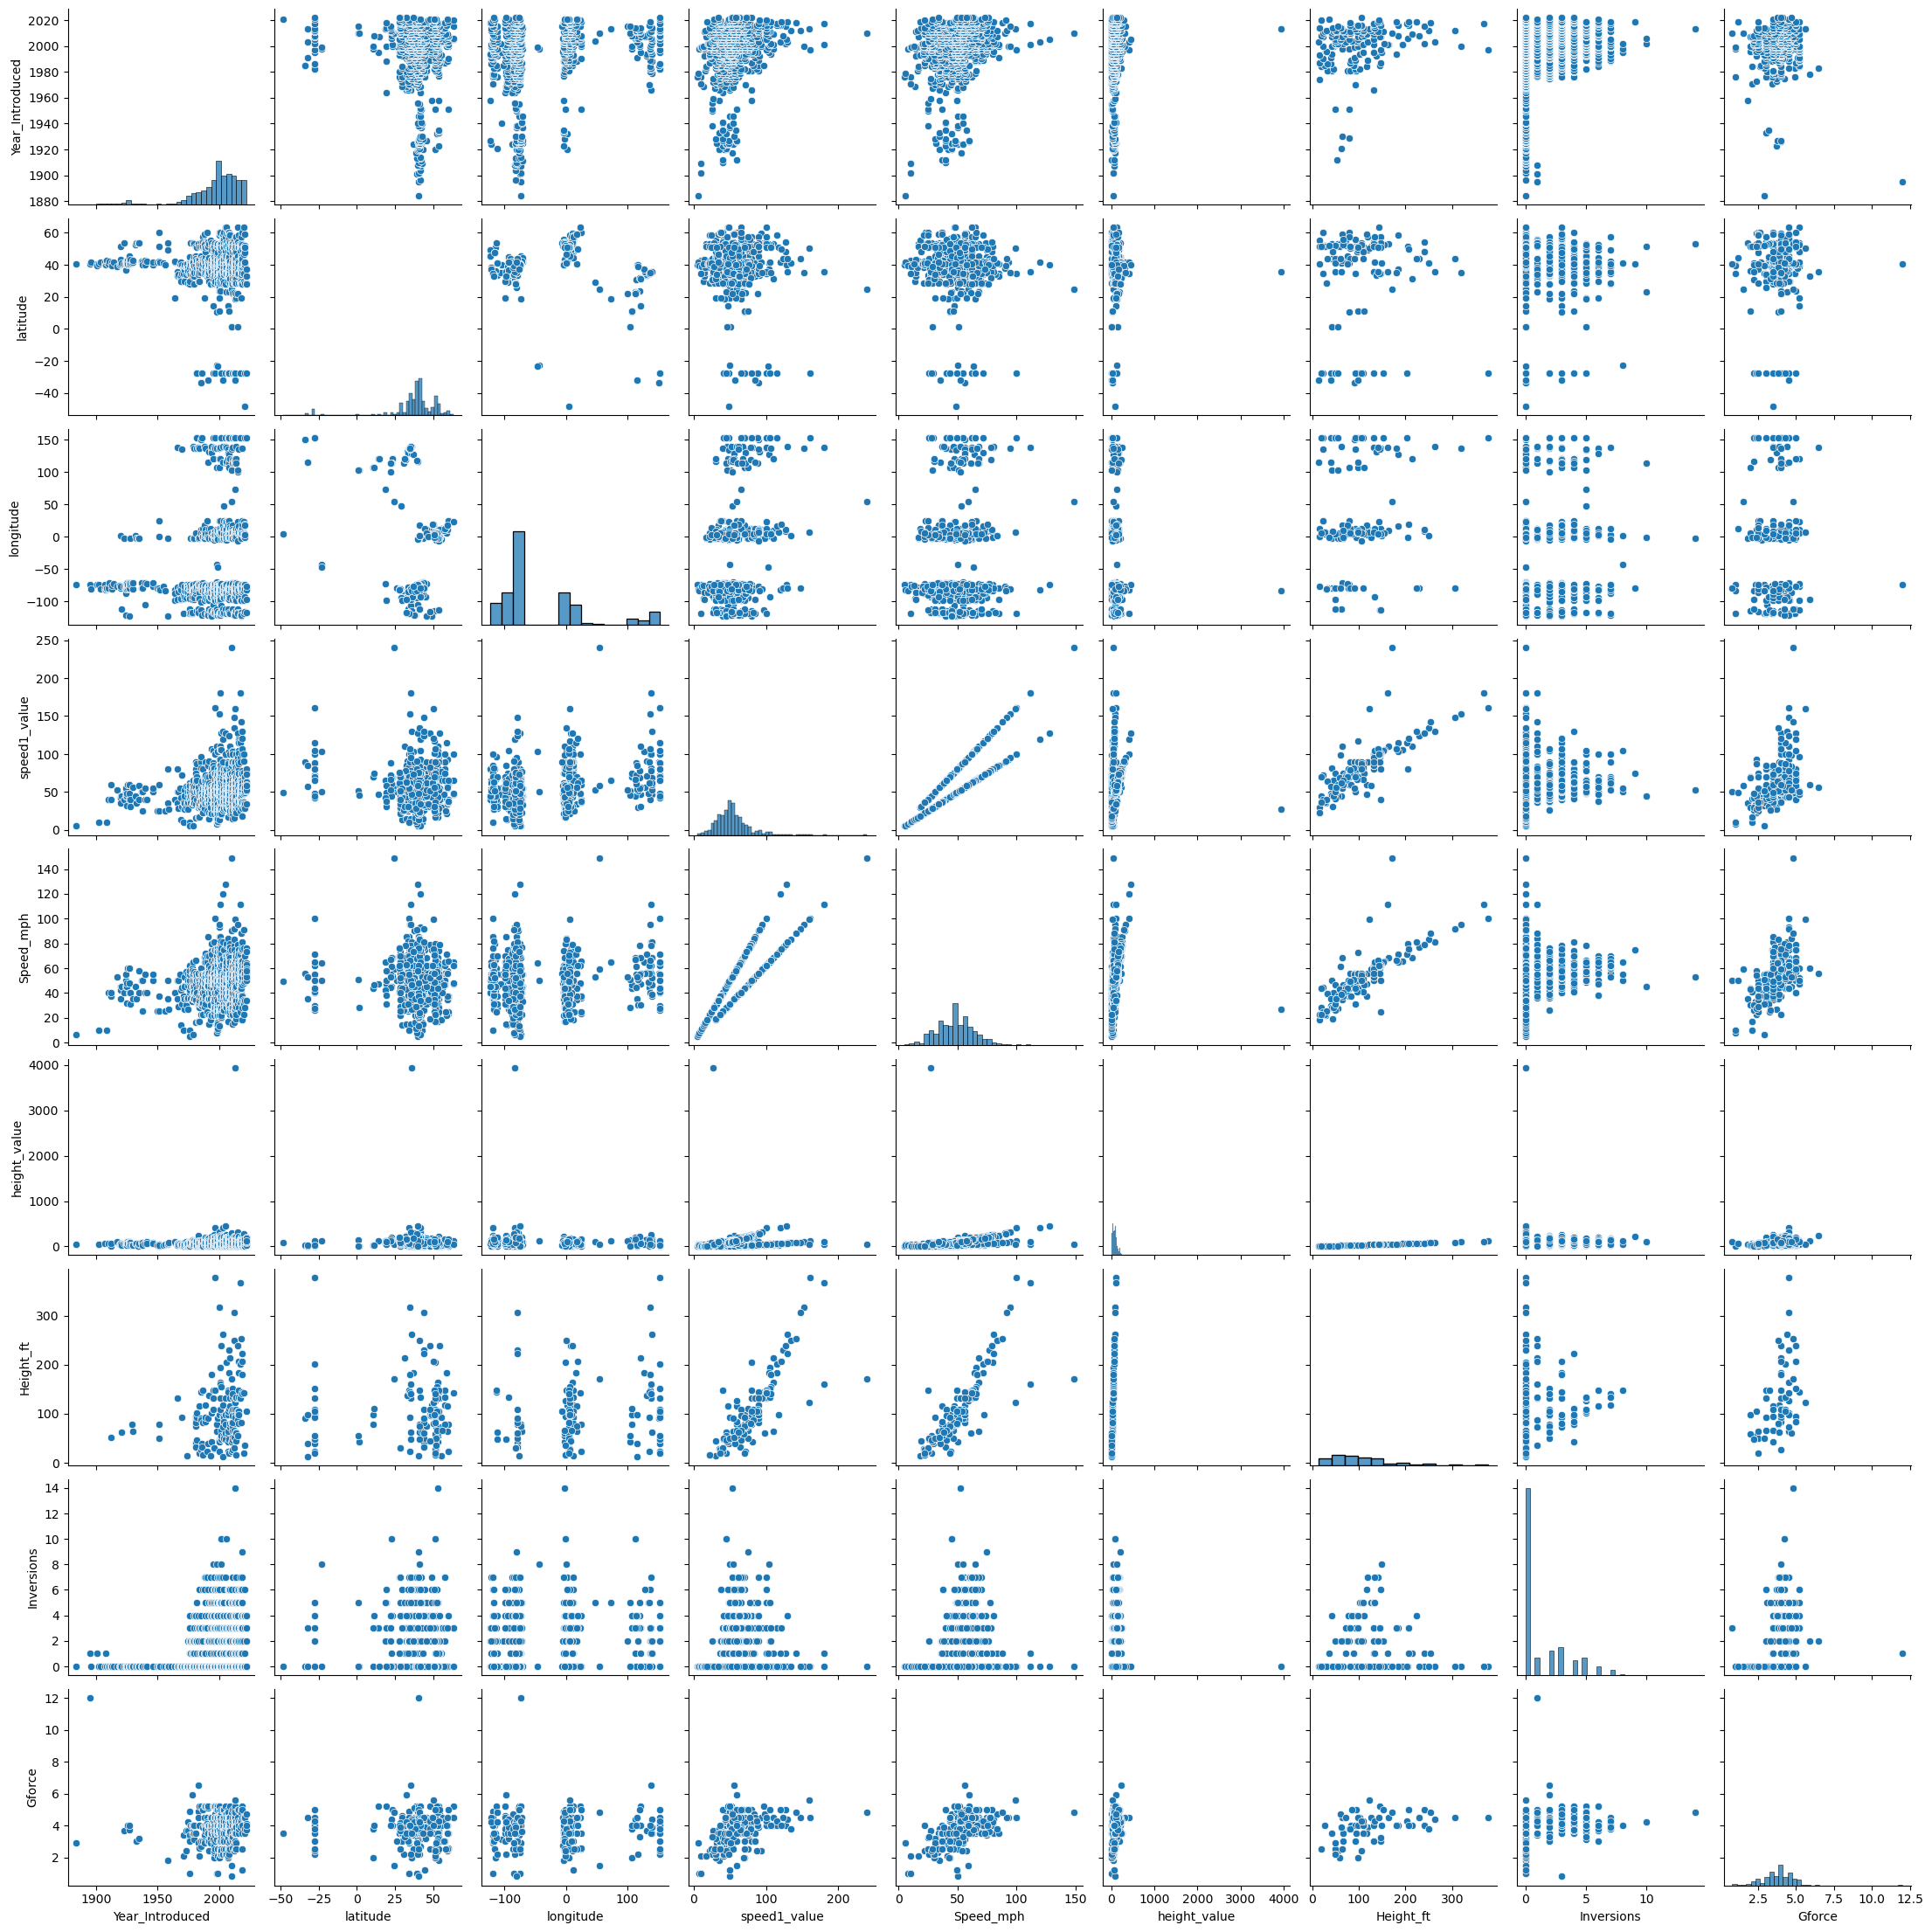

In [16]:
# plot pairwise correlations
sns.pairplot(df)

**Height and speed are positively correlated.**

### Are there any rollercoasters that were introduced before 1950 that are still operating? What are their locations?

In [17]:
df.query("Opening_Date < '1950' and Status == 'Operating'")[['Coaster_Name', 'Opening_Date', 'Location', 'Status']]

,Coaster_Name,Opening_Date,Location,Status
6,Leap-The-Dips,1902-01-01,Lakemont Park,Operating
13,Racer (1910 roller coaster),1927-01-01,Kennywood,Operating
15,The Great Scenic Railway,1912-12-01,Luna Park Melbourne,Operating
22,Jack Rabbit (Kennywood),1920-01-01,Kennywood,Operating
23,Jack Rabbit (Seabreeze),1920-01-01,Seabreeze Amusement Park,Operating
24,Scenic Railway (roller coaster),1920-07-03,Dreamland Margate,Operating
25,Roller Coaster (Lagoon),1921-07-15,Lagoon Amusement Park,Operating
26,Big Dipper (Blackpool Pleasure Beach),1923-08-23,Blackpool Pleasure Beach,Operating
29,Giant Dipper,1924-05-17,Santa Cruz Beach Boardwalk,Operating
32,Thunderhawk (Dorney Park),1924-03-30,Dorney Park & Wildwater Kingdom,Operating
